In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
campaign_type = pd.read_excel("campaign_response.xlsx", sheetname=0)
campaign_response = pd.read_excel("campaign_response.xlsx", sheetname=1)

In [ ]:
campaign

In [9]:
campaign_type.head(5)

,CampaignID,Type,Month
0,1,email,January
1,2,email,January
2,3,SMS,February
3,4,WhatsApp,February
4,5,Long letter,February


In [5]:
campaign_response["response"] = 1

In [7]:
campaign_response.head()

,Patient,CampaignID,response
0,10,1,1
1,23,1,1
2,24,1,1
3,40,1,1
4,55,1,1


In [10]:
merge_campaign = pd.merge(campaign_type, campaign_response, on="CampaignID")

In [12]:
merge_campaign.head()

,CampaignID,Type,Month,Patient,response
0,1,email,January,10,1
1,1,email,January,23,1
2,1,email,January,24,1
3,1,email,January,40,1
4,1,email,January,55,1


## Creat Pivot Table of Patients & Campaign Responses

In [14]:
pivot_campaign = merge_campaign.pivot_table(index=["Patient"],
                                            columns = ["CampaignID"],
                                            values="response"
                                           )

In [17]:
pivot_campaign = pivot_campaign.fillna(0).reset_index()

In [18]:
pivot_campaign.head()

CampaignID,Patient,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## KMeans Clustering

In [19]:
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## plot Elbow Curve

In [28]:
k = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in k]
score = [kmeans[i].fit(pivot_campaign[pivot_campaign.columns[2:]]).score(pivot_campaign[pivot_campaign.columns[2:]]) for i in range(len(kmeans))]

In [29]:
score

[-269.07291666666663,
 -240.04990925589837,
 -219.52777777777777,
 -209.61406546669704,
 -196.93068173730472,
 -191.52402245451026,
 -181.2324573976748,
 -173.32456140350877,
 -165.77661064425772,
 -161.7319264069264,
 -153.27313797313798,
 -148.91689421689424,
 -146.74723040117777,
 -140.16349206349207]

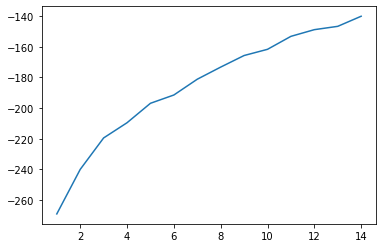

In [30]:
pl.plot(k, score)
pl.xlabel("Number of Clusters")
pl.ylabel("Score")
pl.title("Elbow Curve")

## Create Clusters

In [31]:
cluster = KMeans(n_clusters = 3)

pivot_campaign["cluster"] = cluster.fit_predict(pivot_campaign[pivot_campaign.columns[2:]])

In [32]:
pivot_campaign.head()

CampaignID,Patient,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [33]:
pca = PCA(n_components = 2)
pivot_campaign['x'] = pca.fit_transform(pivot_campaign.iloc[:, 1:33])[:,0]
pivot_campaign['y'] = pca.fit_transform(pivot_campaign.iloc[:, 1:33])[:,1]
pivot_campaign = pivot_campaign.reset_index()

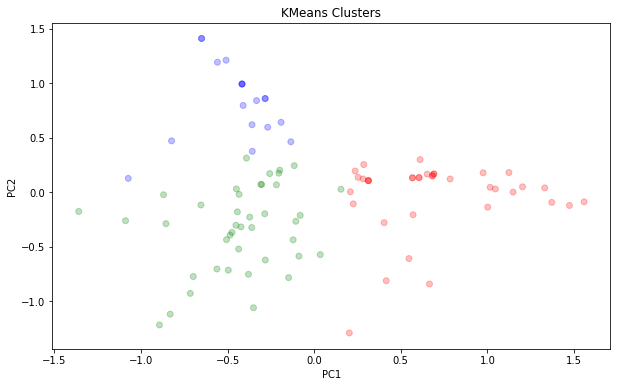

In [39]:
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in cluster.labels_]
fig = pl.figure(figsize=(10,6))
pl.scatter(x='x', y='y', data=pivot_campaign,
            alpha=0.25, color=kmeans_colors)
pl.xlabel("PC1")
pl.ylabel("PC2")
pl.title("KMeans Clusters")
pl.show()

In [40]:
campaign_cluster = pivot_campaign[["Patient", "cluster", "x", "y"]]
campaign_cluster.head()

CampaignID,Patient,cluster,x,y
0,1,1,0.975682,0.177733
1,2,0,-0.307802,0.071641
2,3,2,-0.416673,0.992914
3,4,1,0.547440,-0.609382
4,5,0,-0.379452,-0.753825


In [41]:
final_campaign = pd.merge(campaign_response, campaign_cluster)
final_campaign = pd.merge(campaign_type, final_campaign)
final_campaign.head()

,CampaignID,Type,Month,Patient,response,cluster,x,y
0,1,email,January,10,1,0,-0.282221,-0.622973
1,1,email,January,23,1,0,-0.496037,-0.715865
2,1,email,January,24,1,2,-1.073771,0.126451
3,1,email,January,40,1,0,-0.856150,-0.289071
4,1,email,January,55,1,2,-0.357379,0.375035


In [43]:
final_campaign["cluster_1"] = final_campaign.cluster == 0

In [44]:
final_campaign.groupby("cluster_1").Type.value_counts()

cluster_1  Type       
False      email          56
           SMS            50
           Telephone      26
           WhatsApp       23
           Pamphlet        3
           Long letter     1
True       WhatsApp       78
           Long letter    31
           email          20
           Telephone      17
           Pamphlet       12
           SMS             7
Name: Type, dtype: int64

In [45]:
final_campaign["cluster_2"] = final_campaign.cluster == 1
final_campaign.groupby("cluster_2").Type.value_counts()

cluster_2  Type       
False      WhatsApp       82
           email          60
           Long letter    31
           Telephone      19
           Pamphlet       15
           SMS             7
True       SMS            50
           Telephone      24
           WhatsApp       19
           email          16
           Long letter     1
Name: Type, dtype: int64